In [3]:
import numpy as np
import pandas as pd
import model
import nessra_genes_sets_generator as ng
import mygene 
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [4]:
#------------ SVM ANALYSIS ------------
def svmModel(matrix_t, list_of_sets, obj):
    mat = model.select_table(matrix_t, list_of_sets)
    print("Transpose matrix filtered shape: {}".format(mat.shape))
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(mat.values, obj.values, test_size=0.3,random_state=100) # 70% training and 30% test
    # Define the scaler 
    scaler = StandardScaler().fit(X_train)
    # Scale the train set
    X_train = scaler.transform(X_train)
    # Scale the test set
    X_test = scaler.transform(X_test)
    
    #model training
    clf_ns = model.training(X_train, y_train)

    y_pred = clf_ns.predict(X_test)
    print("")
    print("---- SVM ----")
    print("Proportion of 0s in test y: {}".format(len([x for x in y_test if x <1])/len(y_test)))
    print("Proportion of 0s in prediction y: {}".format(len([x for x in y_pred if x <1])/len(y_pred)))
    print("")
    print(y_test)
    print(y_pred)
    print("AUC:", metrics.roc_auc_score(y_test, y_pred))
    
    return(clf_ns)

def BayesModel(matrix_t, list_of_sets, obj, i):
    mat = model.select_table(matrix_t, list_of_sets)
    #print("Transpose matrix filtered shape: {}".format(mat.shape))
    
    # Split dataset into training set and test set
    if i:
        X_train, X_test, y_train, y_test = train_test_split(mat.values, obj.values, test_size=0.3,random_state=i) # 70% training and 30% test
    else:
        X_train, X_test, y_train, y_test = train_test_split(mat.values, obj.values, test_size=0.3)
    # Define the scaler 
    scaler = StandardScaler().fit(X_train)
    # Scale the train set
    X_train = scaler.transform(X_train)
    # Scale the test set
    X_test = scaler.transform(X_test)

    #Create a Gaussian Classifier
    g_model = GaussianNB()

    # Train the model using the training sets
    g_model.fit(X_train,y_train)

    predicted= g_model.predict(X_test)
    '''
    print("---- Naive Bayes ----")
    print("Proportion of 0s in test y: {}".format(round(len([x for x in y_test if x <1])/len(y_test), 4)))
    print("Proportion of 0s in prediction y: {}".format(round(len([x for x in predicted if x <1])/len(predicted),4)))
    print("")
    print(y_test)
    print(predicted)
    print("AUC:",round(metrics.roc_auc_score(y_test, predicted), 4))
    '''
    
    return round(metrics.roc_auc_score(y_test, predicted), 4)

# Matrix and Objective vector preparation

In [5]:
#------------- MATRIX and CLASS VECTOR
matrix = pd.read_csv(r"~/Documents/UniTn/FirstSemester/BiologicalDataMiningLab/exprMatTop5000ByVar.tsv", sep = "\t", header=0)
#class_vector = pd.read_csv("~/GoogleDrive/DataMiningLab/Model/objective.tsv", sep = "\t", header=0)
print("Matrix shape: {}".format(matrix.shape))
#print(matrix.head(2))
print("")

# transposing matrix
matrix_t = matrix.T
matrix_t.columns = matrix_t.iloc[0]
matrix_t = matrix_t.drop("Gene_ID", axis=0)

print("Transpose matrix shape: {}".format(matrix_t.shape))
print("")


# class vector 
class_vector = pd.read_csv(r"C:/Users/aless/Documents/UniTn/FirstSemester/BiologicalDataMiningLab/objective.tsv", sep = "\t", header=0)
print("Objective shape: {}".format(class_vector.shape))  

# generating barcode of samples
samples_bar = []
for name in list(matrix_t.index.values):
    samples_bar.append(name[:-4])
fil_for_class = class_vector.barcode.isin(samples_bar)
class_vector = class_vector[fil_for_class]
print("Objective shape after filter for matrix samples: {}".format(class_vector.shape))

# Final vector for classifying
obj = class_vector["over5years"]
print("Final obj vector for classication is a {}, len: {}".format(type(obj), len(obj)))
print("")

Matrix shape: (5000, 103)

Transpose matrix shape: (102, 5000)

Objective shape: (104, 3)
Objective shape after filter for matrix samples: (102, 3)
Final obj vector for classication is a <class 'pandas.core.series.Series'>, len: 102



# CorEX genes analysis

In [ ]:
corex_mis = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\corex_mis.tsv", sep = "\t")
corex_mis.shape


In [11]:
coding_filter = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\protein_coding_genes.v22.annotation.txt", sep=" ", header=None)
cd_genes = list(coding_filter.iloc[:,3])
cod_genes = []
for name in cd_genes:
    temp_split = name.split(".")
    cod_genes.append(temp_split[0])

'''for i in range(200):
    cluster_id = i
    n_genes = 1000000'''

genes = []
for name in c_genes:
    if name.split(".")[0] in cod_genes:
        genes.append(name)
print(len(genes))
#print(list(map(lambda x: x.split('.')[0], genes)))

644


In [35]:
#Gene symbol conversion
mg = mygene.MyGeneInfo()
lst=['ENSG00000146083', 'ENSG00000022567', 'ENSG00000112511',
       'ENSG00000173276', 'ENSG00000184014', 'ENSG00000159082',
       'ENSG00000198642', 'ENSG00000058272', 'ENSG00000110713',
       'ENSG00000033327', 'ENSG00000115464', 'ENSG00000183049',
       'ENSG00000167522', 'ENSG00000166987', 'ENSG00000153339',
       'ENSG00000163660', 'ENSG00000070495', 'ENSG00000123353',
       'ENSG00000153207', 'ENSG00000114648', 'ENSG00000102908',
       'ENSG00000168066', 'ENSG00000119638', 'ENSG00000143324',
       'ENSG00000217128', 'ENSG00000061656', 'ENSG00000087206',
       'ENSG00000037637', 'ENSG00000139697', 'ENSG00000143442',
       'ENSG00000164978', 'ENSG00000023287', 'ENSG00000109787',
       'ENSG00000135049', 'ENSG00000038219', 'ENSG00000135250',
       'ENSG00000156639', 'ENSG00000157869', 'ENSG00000170871',
       'ENSG00000109381', 'ENSG00000100030', 'ENSG00000173757',
       'ENSG00000139946', 'ENSG00000137312', 'ENSG00000231074',
       'ENSG00000157764', 'ENSG00000161920', 'ENSG00000177463',
       'ENSG00000147454', 'ENSG00000067900', 'ENSG00000198740',
       'ENSG00000172262', 'ENSG00000204348', 'ENSG00000083896',
       'ENSG00000117625', 'ENSG00000169057', 'ENSG00000166501',
       'ENSG00000156110', 'ENSG00000173273', 'ENSG00000139631',
       'ENSG00000077458', 'ENSG00000151466', 'ENSG00000114982',
       'ENSG00000104885', 'ENSG00000100226', 'ENSG00000162642',
       'ENSG00000058091', 'ENSG00000076108', 'ENSG00000127481',
       'ENSG00000116679', 'ENSG00000213516', 'ENSG00000101751',
       'ENSG00000078304', 'ENSG00000147050', 'ENSG00000164327',
       'ENSG00000178974', 'ENSG00000120616', 'ENSG00000147383',
       'ENSG00000153815', 'ENSG00000164715', 'ENSG00000146416',
       'ENSG00000160584']
ens2sym = mg.querymany(list(map(lambda x: x.split('.')[0], c_genes)), scopes='ensemblgene', fields='symbol', as_dataframe=True, returnall=False)
print(ens2sym)
#ens2sym = ens2sym.loc[ens2sym['notfound'] != True, 'symbol']
ens2sym = ens2sym.loc[:, 'symbol']
print('\n'.join(ens2sym))

querying 1-12...done.
Finished.
                    _id     _score   symbol
query                                      
ENSG00000267206  158062  20.525963     LCN6
ENSG00000172554   54221  20.029093    SNTG2
ENSG00000134115   27255  20.002190    CNTN6
ENSG00000168454   84203  19.055275   TXNDC2
ENSG00000229676   57615  20.533491   ZNF492
ENSG00000120907     148  20.011751   ADRA1A
ENSG00000108231    9211  19.987091     LGI1
ENSG00000038295    7092  19.846603     TLL1
ENSG00000112232  202559  19.299316  KHDRBS2
ENSG00000166960  374864  19.998314  CCDC178
ENSG00000166105  112937  20.016449   GLB1L3
ENSG00000197561    1991  19.319918    ELANE
LCN6
SNTG2
CNTN6
TXNDC2
ZNF492
ADRA1A
LGI1
TLL1
KHDRBS2
CCDC178
GLB1L3
ELANE


In [33]:
#clusters = range(10)
#cardinalities = [1343,345,17,17,12,42,34,18,22,27]
clusters = [73]
cardinalities = [12]

c_genes = [model.select_genes(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\Coding\corex_mis.tsv", cluster_id, n_genes) for cluster_id, n_genes in zip(clusters, cardinalities)]

import itertools
c_genes = list(itertools.chain.from_iterable(c_genes))
print("Len of selected genes: {}".format(len(c_genes)))
print(c_genes)

#sizes = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\Coding\sizes.tsv", sep='\s', header=None, names=['count', 'cluster'])
#print(sizes.head())

Len of selected genes: 12
['ENSG00000267206.4', 'ENSG00000172554.10', 'ENSG00000134115.11', 'ENSG00000168454.11', 'ENSG00000229676.2', 'ENSG00000120907.16', 'ENSG00000108231.10', 'ENSG00000038295.6', 'ENSG00000112232.8', 'ENSG00000166960.15', 'ENSG00000166105.14', 'ENSG00000197561.5']


In [ ]:
# Bayes

auc_scores = []
for i in range(1,1300):
    c_genes = model.select_genes(corex_mis, cluster_id, i)
    auc = BayesModel(matrix_t, [set(c_genes)], obj)
    auc_scores.append(auc)


In [ ]:
print(np.argmin(auc_scores[200:]) + 200)
print(auc_scores[500])
plt.plot(range(1,1300), auc_scores)


In [ ]:
auc268_500 = auc_scores[268:500]

ch_rate = [auc268_500[0]]
for el in range(1,len(auc268_500)):
    rate = auc268_500[el] - auc268_500[el-1]
    ch_rate.append(rate)
index_up_genes = [i+268 for i in range(len(ch_rate)) if ch_rate[i] > 0]
print(len(index_up_genes))

genes_int1 = list(map(lambda x: c_genes[x], index_up_genes))

auc700_800 = auc_scores[700:800]

ch_rate = [auc700_800[0]]
for el in range(1,len(auc700_800)):
    rate = auc700_800[el] - auc700_800[el-1]
    ch_rate.append(rate)
index_up_genes = [i+700 for i in range(len(ch_rate)) if ch_rate[i] > 0]
print(len(index_up_genes))

genes_int2 = list(map(lambda x: c_genes[x], index_up_genes))



In [ ]:
auc1 = BayesModel(matrix_t, [set(genes_int1), set(genes_int2)], obj)
print(auc1)



auc2 = BayesModel(matrix_t, [set(genes_int1)], obj)
print(auc2)


c:\users\aless\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


[(0.622165, 0.06570792703319744, 73), (0.6122480000000001, 0.07782054417697168, 69), (0.601927, 0.07862759548021292, 123), (0.60114, 0.07622468497803057, 49), (0.590018, 0.08056402966585025, 5)]


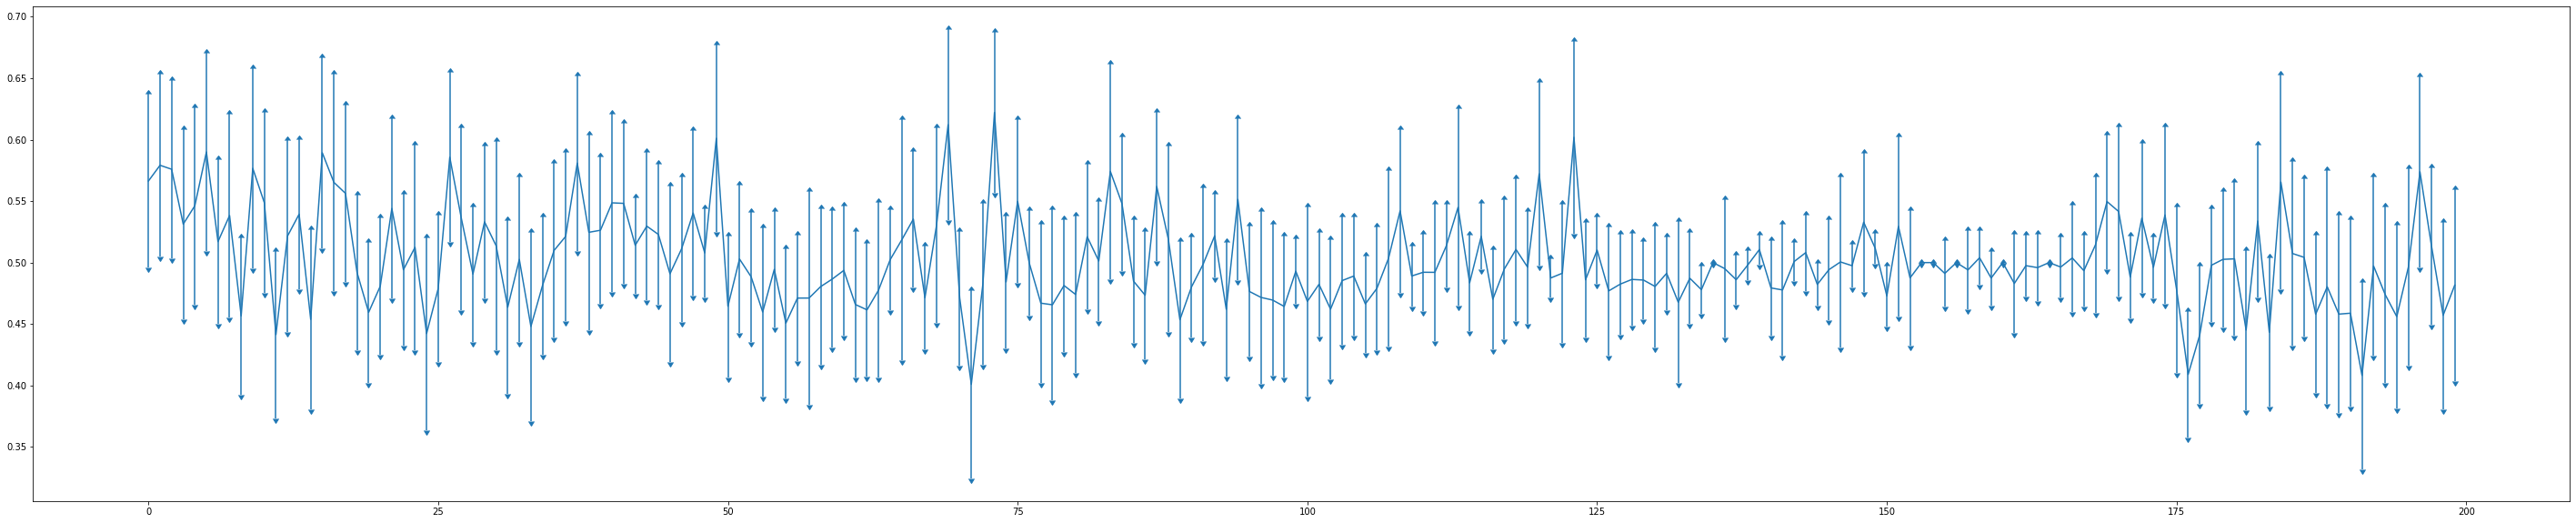

In [21]:
sizes = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\Coding\sizes.tsv", sep='\s', header=None, names=['count', 'cluster'])
corex_mis = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\Coding\corex_mis.tsv", sep='\t')
accuracies_per_cluster=[]
for i, row in sizes.iterrows():
    c_genes = model.select_genes_(corex_mis, row[1], row[0]) 
    acc = []
    for i in range(100):
        j = i+42
        auc = BayesModel(matrix_t, [set(c_genes)], obj, j)
        acc.append(auc)
    avg=np.mean(acc)
    dev=np.std(acc)
    accuracies_per_cluster.append((avg, dev, row[1]))
accs=list(map(lambda x: x[0], accuracies_per_cluster))
plt.figure(figsize=(50,10))
plt.errorbar(x=list(range(200)), y=list(map(lambda x: x[0], accuracies_per_cluster)), yerr=list(map(lambda x: x[1], accuracies_per_cluster)), uplims=True, lolims=True)
accuracies_per_cluster.sort(key=lambda x:x[0], reverse=True)
print(accuracies_per_cluster[:5])

In [34]:
acc = []
for i in range(100):
    j = i+50
    auc = BayesModel(matrix_t, [set(c_genes)], obj, j)
    acc.append(auc)
print(np.mean(acc))
print(np.std(acc))

0.6215999999999999
0.07066255868562928


In [ ]:
genes_list = list(set(genes_int1).union(set(genes_int2)))

new_list = []
for name in genes_list:
    temp_split = name.split(".")
    new_list.append(temp_split[0])
print(len(new_list))
print(", ".join(new_list))


In [10]:
tab=pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\corex_mis.tsv", header=0, index_col=0, sep='\t')
tab.head()
c_genes=tab.columns.values

# Baseline Implementation

In [12]:
genes5k = list(matrix_t.columns)


### Naive with all 5k genes

In [17]:
acc = []
for i in range(100):
    j = i+42
    auc = BayesModel(matrix_t, [set(genes5k)], obj, j)
    acc.append(auc)
avg=np.mean(acc)
dev=np.std(acc)
print(avg, dev)

0.5059939999999998 0.0740281849297955


### Naive with first 20 genes CoRex

In [19]:
matrix20 = matrix_t.iloc[:,:20]
genes20 = list(matrix20.columns)

acc = []
for i in range(100):
    j = i+42
    auc = BayesModel(matrix_t, [set(genes20)], obj, j)
    acc.append(auc)
avg=np.mean(acc)
dev=np.std(acc)
print(avg, dev)

0.44467299999999993 0.06734089968956458


### Naive with first 82 genes NESSRA

In [20]:
matrix82 = matrix_t.iloc[:,:82]
genes82 = list(matrix82.columns)

acc = []
for i in range(100):
    j = i+42
    auc = BayesModel(matrix_t, [set(genes82)], obj, j)
    acc.append(auc)
avg=np.mean(acc)
dev=np.std(acc)
print(avg, dev)

0.43992500000000007 0.08284777773121016
